In [ ]:
import torch
tmp = torch.Tensor([1., 2., 3.])
print(tmp.shape)                       # Исходная размерность
print(tmp.unsqueeze_(1).shape)         # Размерность после применения unsqueeze_

# Результат
torch.Size([3])
torch.Size([3, 1])

torch.Size([3])
torch.Size([3, 1])


torch.Size([3, 1])

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
      
        return x

sine_net = SineNet(3)

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(3)

0.02059975080192089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


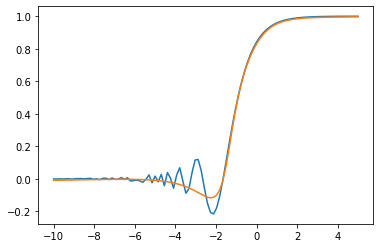

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons*2)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons*2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
net = RegressionNet(50)

# ------Dataset preparation start--------:
x = torch.linspace(-10,5,100)
y = [target_function(i) for i in x]
plt.plot(x,y)
x_train =  torch.linspace(-10, 5, 10000)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    return (pred - target).abs().mean()

for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
x.unsqueeze_(1)
y=net.forward(torch.tensor(x)).detach().numpy()
plt.plot(x,y)


In [49]:
import re
import datetime
def is_ok_polis(polis):
  return bool(re.fullmatch('\d{16}',polis))
def is_ok_date(date):
  if bool(re.fullmatch('\d{2}.\d{2}.\d{4}',date)):
    today = datetime.date.today()
    date = [int(i) for i in date.split('.')]
    try:
      return datetime.date(*date[::-1]) < today 
    except: return False
  return False
print(is_ok_date('28.10.2000'))

True


In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
print(random.randint(0, 10))

6
